<a href="https://colab.research.google.com/github/ShahzaibSE/langgraph-e2e-solutions/blob/main/edges_and_nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is LangGraph?

LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows.

Compared to other LLM frameworks, it offers these core benefits: cycles, controllability, and persistence.

LangGraph allows you to define flows that involve cycles, essential for most agentic architectures, differentiating it from DAG-based solutions.

As a very low-level framework, it provides fine-grained control over both the flow and state of your application, crucial for creating reliable agents.

Additionally, LangGraph includes built-in persistence, enabling advanced human-in-the-loop and memory features.

Key Features¶
- **Cycles and Branching:** Implement loops and conditionals in your apps.
- **Persistence:** Automatically save state after each step in the graph. Pause and resume the graph execution at any point to support error recovery, human-in-the-loop workflows, time travel and more.
- **Human-in-the-Loop:** Interrupt graph execution to approve or edit next action planned by the agent.
- **Streaming Support:** Stream outputs as they are produced by each node (including token streaming).
- **Integration with LangChain:** LangGraph integrates seamlessly with LangChain and LangSmith (but does not require them).

https://langchain-ai.github.io/langgraph/

https://chatgpt.com/share/66f9d1bf-58e0-8002-84d0-1c1f8d5b4389

In [ ]:
%%capture --no-stderr
!pip install --quiet -U langgraph

In [ ]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
    prompt:str

In [ ]:
lahore_state: LearningState = LearningState(prompt= "hello from UMT Lahore")

### **State**

State¶
The first thing you do when you define a graph is define the State of the graph. The State consists of the schema of the graph as well as reducer functions which specify how to apply updates to the state. The schema of the State will be the input schema to all Nodes and Edges in the graph, and can be either a TypedDict or a Pydantic model. All Nodes will emit updates to the State which are then applied using the specified reducer function.

[State](https://langchain-ai.github.io/langgraph/concepts/low_level/#state)

We can use pydantic models for our e2e solutions but let's use TypedDict from typings in Python for practice.

`TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.


### **MessageGraph**
The MessageGraph class is a special type of graph. The State of a MessageGraph is ONLY a list of messages. This class is rarely used except for chatbots, as most applications require the State to be more complex than a list of messages.

In [ ]:
print(lahore_state)
print(lahore_state['prompt'])
print(lahore_state['prompt'] +" I am")
print(lahore_state)
print(type(lahore_state))

{'prompt': 'hello from UMT Lahore'}
hello from UMT Lahore
hello from UMT Lahore I am
{'prompt': 'hello from UMT Lahore'}
<class 'dict'>


In [ ]:
user_prompt_state: LearningState = LearningState(prompt='Hi! I\'m from Pakistan')

In [ ]:
print(type(user_prompt_state))

<class 'dict'>


In [ ]:
print(user_prompt_state)
print(user_prompt_state['prompt'] + "," + " I'm a GenAI Full-Stack Software Developer")
# print(user_prompt['prompt'] + "," + "I'm a GenAI Full-Stack Software Developer")

{'prompt': "Hi! I'm from Pakistan"}
Hi! I'm from Pakistan, I'm a GenAI Full-Stack Software Developer


## Nodes

[Nodes](https://langchain-ai.github.io/langgraph/concepts/low_level/#nodes) are just python functions.

The first positional argument is the state, as defined above.

Because the state is a `TypedDict` with schema as defined above, each node can access the key, `graph_state`, with `state['graph_state']`.

Each node returns a new value of the state key `graph_state`.
  
By default, the new value returned by each node [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior state value.

## Edges

[Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#edges) connect the nodes.

Normal Edges are used if you want to *always* go from, for example, `node_1` to `node_2`.

## Graph Construction

Now, we build the graph from our [components](
https://langchain-ai.github.io/langgraph/concepts/low_level/) defined above.

The [StateGraph class](https://langchain-ai.github.io/langgraph/concepts/low_level/#stategraph) is the graph class that we can use.

First, we initialize a StateGraph with the `State` class we defined above.

Then, we add our nodes and edges.

We use the [`START` Node, a special node](https://langchain-ai.github.io/langgraph/concepts/low_level/#start-node) that sends user input to the graph, to indicate where to start our graph.

The [`END` Node](https://langchain-ai.github.io/langgraph/concepts/low_level/#end-node) is a special node that represents a terminal node.

Finally, we [compile our graph](https://langchain-ai.github.io/langgraph/concepts/low_level/#compiling-your-graph) to perform a few basic checks on the graph structure.

We can visualize the graph as a [Mermaid diagram](https://github.com/mermaid-js/mermaid).

In [ ]:
from IPython.display import Image, display #Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

builder: StateGraph = StateGraph(state_schema=LearningState)

In [ ]:
def node_1(state: LearningState) -> LearningState:
    print("---Node 1 State---", state)
    return {"prompt": state['prompt'] +" I am"}

def node_2(state: LearningState) -> LearningState:
    print("---Node 2 State---", state)
    return {"prompt": state['prompt'] +" Shahzaib!"}

In [ ]:
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

## Edges

[Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#edges) connect the nodes.

Normal Edges are used if you want to *always* go from, for example, `node_1` to `node_2`.

In [ ]:
# Let's check the type of the builder.
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


## Graph Construction

Now, we build the graph from our [components](
https://langchain-ai.github.io/langgraph/concepts/low_level/) defined above.

The [StateGraph class](https://langchain-ai.github.io/langgraph/concepts/low_level/#stategraph) is the graph class that we can use.

First, we initialize a StateGraph with the `State` class we defined above.

Then, we add our nodes and edges.

We use the [`START` Node, a special node](https://langchain-ai.github.io/langgraph/concepts/low_level/#start-node) that sends user input to the graph, to indicate where to start our graph.

The [`END` Node](https://langchain-ai.github.io/langgraph/concepts/low_level/#end-node) is a special node that represents a terminal node.

Finally, we [compile our graph](https://langchain-ai.github.io/langgraph/concepts/low_level/#compiling-your-graph) to perform a few basic checks on the graph structure.

We can visualize the graph as a [Mermaid diagram](https://github.com/mermaid-js/mermaid).

In [ ]:
# Simples Edges Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

In [ ]:
# Next step to compile the graph
graph: CompiledStateGraph = builder.compile()

In [ ]:
print(graph)

In [ ]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])

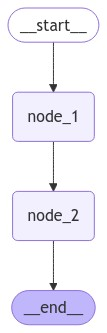

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

## Graph Invocation

The compiled graph implements the [runnable](https://python.langchain.com/v0.1/docs/expression_language/interface/) protocol.

This provides a standard way to execute LangChain components.

`invoke` is one of the standard methods in this interface.

The input is a dictionary `{"graph_state": "Hi, this is lance."}`, which sets the initial value for our graph state dict.

When `invoke` is called, the graph starts execution from the `START` node.

It progresses through the defined nodes (`node_1`, `node_2`, `node_3`) in order.

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues until it reaches the `END` node.

In [ ]:
graph.invoke({'prompt':'Introduce yourself'})
# graph.invoke({'prompt':'How are you?'})

---Node 1 State--- {'prompt': 'Introduce yourself'}
---Node 2 State--- {'prompt': 'Introduce yourself I am'}


{'prompt': 'Introduce yourself I am Shahzaib!'}

`invoke` runs the entire graph synchronously.

This waits for each step to complete before moving to the next.

It returns the final state of the graph after all nodes have executed.

In this case, it returns the state after `node_3` has completed:

```
{'graph_state': 'Hi, this is Lance. I am sad!'}
```

## Task: In Nodes Use LLM == GoogleChatModel in Langchain

In [ ]:
!pip install -U langchain
!pip install -U langchain-google-genai

In [ ]:
!pip install -U langchain_community

In [ ]:
from google.colab import userdata
openai_api_key = userdata.get('OPEN_API_KEY')

In [ ]:
from langchain.llms import OpenAI

openai_llm = OpenAI(temperature=0.8,
                    openai_api_key=openai_api_key)

In [ ]:
from langchain_core.messages.ai import AIMessage

ai_msg: AIMessage = openai_llm.invoke("Greet me")
print(ai_msg)

, my dear friend.

Hello there! It's so nice to see you. How have you been? 


### **Let's create a graph for this**

In [ ]:
from typing_extensions import TypedDict

class FirstLLMAgentCall(TypedDict):
    prompt:str
    output:str

In [ ]:
greet_message = node_1(FirstLLMAgentCall(prompt='Hello from Pakistan'))
print(greet_message)

---Node 1 State--- {'prompt': 'Hello from Pakistan'}
{'prompt': 'Hello from Pakistan I am'}


In [ ]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Creating builder
builder: StateGraph = StateGraph(state_schema=FirstLLMAgentCall)

# Define Nodes
builder.add_node("node_1", node_1)

# Add Edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Compile Graph
graph: CompiledStateGraph = builder.compile()

In [ ]:
def node_1(state:FirstLLMAgentCall):
   print("Node 1 -- State")
   prompt: str = state['prompt']
   ai_message:AIMessage =  openai_llm.invoke(prompt)
   return {'output':ai_message}

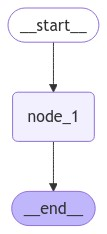

In [ ]:
# Displaying our updated graph.
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({"prompt" : "Motivate me to learn LangGraph"})

---Node 1 State--- {'prompt': 'Motivate me to learn LangGraph'}


In [ ]:
import textwrap
from IPython.display import Markdown, display

def to_markdown(text:str, ) -> Markdown:
    new_text:str = text.replace(".", " *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [ ]:
print("PROMPT: ", result['prompt'])
to_markdown(result['prompt'])

PROMPT:  Motivate me to learn LangGraph I am


> Motivate me to learn LangGraph I am